In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100      # Display DPI (for notebooks)
plt.rcParams['savefig.dpi'] = 350     # Save DPI (high quality!)

print("=" * 70)
print("RISK-BASED AUTHENTICATION SYSTEM - EDA")
print("=" * 70)

RISK-BASED AUTHENTICATION SYSTEM - EDA


In [3]:
# %%
# ============================================================================
# STEP 1: LOAD DATASET
# ============================================================================

try:
    # Method 1: Load 10% of rows using skiprows (faster, less memory)
    # This randomly skips 90% of rows while loading
    
    # First, get total line count (optional, for progress tracking)
    print("📊 Loading 10% sample of the dataset...")
    
    # Load with random sampling - skiprows with lambda function
    # This keeps approximately 10% of rows
    df = pd.read_csv(
        '/kaggle/input/rba-dataset/rba-dataset.csv',
        skiprows=lambda i: i > 0 and np.random.random() > 0.1,  # Keep 10% of rows
        low_memory=False
    )
    
    print(f"✓ Dataset sample loaded successfully!")
    print(f"  Sample Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"  Estimated Full Dataset: ~{df.shape[0] * 10:,} rows")
    print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
except FileNotFoundError:
    print("⚠ Dataset file not found!")
    print("\nTo download the dataset:")
    print("1. Visit: https://www.kaggle.com/datasets/dasgroup/rba-dataset")
    print("2. Download the CSV file")
    print("3. Place it in the same directory as this script")
    print("4. Update the filename in the code if needed")
    exit()
except MemoryError:
    print("⚠ Memory error! Trying with smaller sample (5%)...")
    try:
        df = pd.read_csv(
            '/kaggle/input/rba-dataset/rba-dataset.csv',
            skiprows=lambda i: i > 0 and np.random.random() > 0.05,  # Keep 5% of rows
            low_memory=False
        )
        print(f"✓ 5% sample loaded successfully!")
        print(f"  Sample Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    except:
        print("❌ Unable to load dataset. Try further reducing sample size.")
        exit()

# Create a copy for cleaning
df_clean = df.copy()
print(f"\n✓ Working copy created for data cleaning")


📊 Loading 10% sample of the dataset...
✓ Dataset sample loaded successfully!
  Sample Shape: 3,127,996 rows × 16 columns
  Estimated Full Dataset: ~31,279,960 rows
  Memory Usage: 2308.25 MB

✓ Working copy created for data cleaning


In [4]:
# %%
# ============================================================================
# STEP 2: INITIAL DATA INSPECTION
# ============================================================================
print("\n[STEP 2] Initial Data Inspection")
print("-" * 70)

print("\n📊 Dataset Info:")
print(df.info())

print("\n📋 First 5 Rows:")
print(df.head())

print("\n📋 Column Names:")
print(df.columns.tolist())

print("\n📊 Data Types:")
print(df.dtypes.value_counts())



[STEP 2] Initial Data Inspection
----------------------------------------------------------------------

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127996 entries, 0 to 3127995
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   index                     int64  
 1   Login Timestamp           object 
 2   User ID                   int64  
 3   Round-Trip Time [ms]      float64
 4   IP Address                object 
 5   Country                   object 
 6   Region                    object 
 7   City                      object 
 8   ASN                       int64  
 9   User Agent String         object 
 10  Browser Name and Version  object 
 11  OS Name and Version       object 
 12  Device Type               object 
 13  Login Successful          bool   
 14  Is Attack IP              bool   
 15  Is Account Takeover       bool   
dtypes: bool(3), float64(1), int64(3), object(9)
memory usage: 

In [5]:
# %%
# ============================================================================
# STEP 3: BASIC STATISTICS
# ============================================================================
print("\n[STEP 3] Basic Statistics")
print("-" * 70)

print("\n📈 Numerical Features Summary:")
print(df.describe())

print("\n📈 Categorical Features Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col}:")
    print(df[col].value_counts().head())



[STEP 3] Basic Statistics
----------------------------------------------------------------------

📈 Numerical Features Summary:
              index       User ID  Round-Trip Time [ms]           ASN
count  3.127996e+06  3.127996e+06         127847.000000  3.127996e+06
mean   1.563312e+07 -1.926309e+18            667.192910  1.621746e+05
std    9.026887e+06  4.513156e+18           1307.707302  1.719376e+05
min    1.700000e+01 -9.223361e+18              9.000000  1.200000e+01
25%    7.820064e+06 -4.324476e+18            472.000000  2.969500e+04
50%    1.562702e+07 -4.324476e+18            539.000000  4.116400e+04
75%    2.345829e+07  9.078341e+17            676.000000  3.933980e+05
max    3.126926e+07  9.223309e+18         223457.000000  5.077220e+05

📈 Categorical Features Summary:

Login Timestamp:
Login Timestamp
2020-04-07 17:01:22.605    2
2020-02-09 16:29:45.175    2
2021-01-10 10:31:02.818    2
2020-03-19 13:21:16.754    2
2020-11-15 23:56:10.492    1
Name: count, dtype: int64

IP


[STEP 4] Missing Values Analysis
----------------------------------------------------------------------

🔍 Missing Values:
                      Missing_Count  Percentage
Round-Trip Time [ms]        3000149   95.912814
Region                         4749    0.151822
City                            904    0.028900
Device Type                     155    0.004955


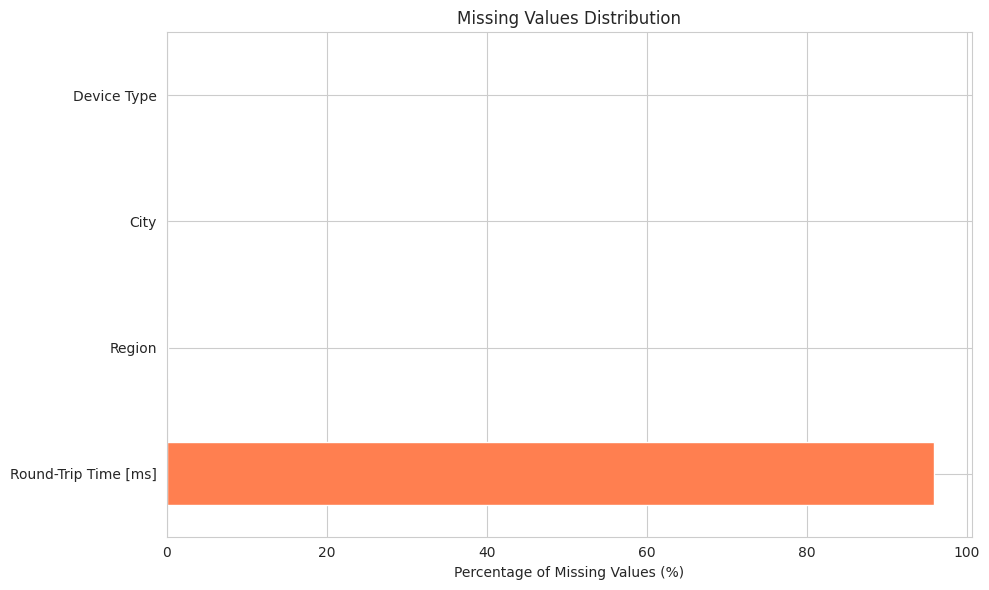

In [6]:
# %%
# ============================================================================
# STEP 4: MISSING VALUES ANALYSIS
# ============================================================================
print("\n[STEP 4] Missing Values Analysis")
print("-" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("\n🔍 Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ No missing values found!")

# Visualize missing values
missing_cols = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_cols) > 0:
    plt.figure(figsize=(10, 6))
    missing_cols['Percentage'].sort_values(ascending=False).plot(kind='barh', color='coral')
    plt.xlabel('Percentage of Missing Values (%)')
    plt.title('Missing Values Distribution')
    plt.tight_layout()
    plt.show()


In [7]:
# %%
# ============================================================================
# STEP 5: HANDLE MISSING VALUES
# ============================================================================
print("\n[STEP 5] Handle Missing Values")
print("-" * 70)

# Identify columns with missing values
cols_with_missing = missing_df[missing_df['Missing_Count'] > 0].index.tolist()

if len(cols_with_missing) > 0:
    print(f"\n📋 Columns with missing values: {cols_with_missing}")
    
    cols_to_drop = []
    
    for col in cols_with_missing:
        missing_pct = (df_clean[col].isnull().sum() / len(df_clean)) * 100
        
        if missing_pct > 80:
            print(f"\n  ❌ {col}: {missing_pct:.2f}% missing (CRITICAL)")
            print(f"     Action: DROPPING column (too sparse for reliable analysis)")
            cols_to_drop.append(col)
        
        elif missing_pct > 50:
            print(f"\n  ⚠ {col}: {missing_pct:.2f}% missing (HIGH)")
            print(f"     Action: DROPPING column (insufficient data for imputation)")
            cols_to_drop.append(col)
        
        elif df_clean[col].dtype in ['float64', 'int64']:
            # For numerical columns: fill with median
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"\n  ✓ {col}: {missing_pct:.2f}% missing")
            print(f"     Action: Filled with median ({median_val:.2f})")
        
        else:
            # For categorical columns: fill with mode
            mode_val = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else "Unknown"
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"\n  ✓ {col}: {missing_pct:.2f}% missing")
            print(f"     Action: Filled with mode ({mode_val})")
    
    # Drop columns with critical missing values
    if cols_to_drop:
        print(f"\n{'─' * 70}")
        print(f"🗑 Dropping {len(cols_to_drop)} column(s) with insufficient data:")
        for col in cols_to_drop:
            print(f"   - {col}")
        df_clean.drop(cols_to_drop, axis=1, inplace=True)
        print(f"✓ Columns dropped successfully")
    
    print(f"\n{'─' * 70}")
    print(f"✓ Missing value handling complete!")
    print(f"  Remaining columns: {df_clean.shape[1]}")
    print(f"  Total missing values: {df_clean.isnull().sum().sum()}")
else:
    print("✓ No missing values to handle!")


[STEP 5] Handle Missing Values
----------------------------------------------------------------------

📋 Columns with missing values: ['Round-Trip Time [ms]', 'Region', 'City', 'Device Type']

  ❌ Round-Trip Time [ms]: 95.91% missing (CRITICAL)
     Action: DROPPING column (too sparse for reliable analysis)

  ✓ Region: 0.15% missing
     Action: Filled with mode (-)

  ✓ City: 0.03% missing
     Action: Filled with mode (-)

  ✓ Device Type: 0.00% missing
     Action: Filled with mode (mobile)

──────────────────────────────────────────────────────────────────────
🗑 Dropping 1 column(s) with insufficient data:
   - Round-Trip Time [ms]
✓ Columns dropped successfully

──────────────────────────────────────────────────────────────────────
✓ Missing value handling complete!
  Remaining columns: 15
  Total missing values: 0


In [8]:
# %%
# ============================================================================
# STEP 6: DUPLICATE DETECTION AND HANDLING
# ============================================================================
print("\n[STEP 6] Duplicate Detection and Handling")
print("-" * 70)

# Check for complete duplicates
complete_duplicates = df_clean.duplicated().sum()
print(f"\n📊 Complete Duplicates (all columns): {complete_duplicates}")

if complete_duplicates > 0:
    duplicate_pct = (complete_duplicates / len(df_clean)) * 100
    print(f"   Percentage: {duplicate_pct:.2f}%")
    
    # Remove complete duplicates
    df_clean = df_clean.drop_duplicates()
    print(f"   ✓ Removed {complete_duplicates} complete duplicate rows")
    print(f"   New shape: {df_clean.shape}")



[STEP 6] Duplicate Detection and Handling
----------------------------------------------------------------------

📊 Complete Duplicates (all columns): 0


In [9]:
# %%
# ============================================================================
# STEP 7: OUTLIER DETECTION (EXCLUDING USER ID)
# ============================================================================
print("\n[STEP 7] Outlier Detection (IQR Method)")
print("-" * 80)

numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'User ID' from outlier analysis
numerical_cols_for_outliers = [col for col in numerical_cols if col != 'User ID']

print(f"\n📋 Numerical columns for outlier analysis: {numerical_cols_for_outliers}")
print("   (User ID excluded as it's useful for feature engineering)")

outlier_summary = {}

for col in numerical_cols_for_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(df_clean)) * 100
    
    if outliers > 0:
        outlier_summary[col] = {
            'count': outliers,
            'percentage': outlier_pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

if outlier_summary:
    print("\n🔍 Outliers Detected (IQR method):\n")
    for col, info in outlier_summary.items():
        print(f"  {col}:")
        print(f"    Count: {info['count']} ({info['percentage']:.2f}%)")
        print(f"    Range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
else:
    print("\n✓ No significant outliers detected!")

# Visualize outliers
if len(numerical_cols_for_outliers) > 0:
    fig, axes = plt.subplots(1, min(3, len(numerical_cols_for_outliers)), 
                             figsize=(15, 5))
    if len(numerical_cols_for_outliers) == 1:
        axes = [axes]
    
    for idx, col in enumerate(numerical_cols_for_outliers[:3]):
        axes[idx].boxplot(df_clean[col].dropna())
        axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Value')
    
    plt.tight_layout()
    plt.savefig('07_outlier_detection.png', dpi=350, bbox_inches='tight')
    print("\n✓ Saved: 07_outlier_detection.png")
    plt.close()



[STEP 7] Outlier Detection (IQR Method)
--------------------------------------------------------------------------------

📋 Numerical columns for outlier analysis: ['index', 'ASN']
   (User ID excluded as it's useful for feature engineering)

✓ No significant outliers detected!

✓ Saved: 07_outlier_detection.png


In [10]:
# %%
# ============================================================================
# STEP 8: DATA TYPE VALIDATION AND CONVERSION
# ============================================================================
print("\n[STEP 8] Data Type Validation and Conversion")
print("-" * 80)

print("\n📊 Current Data Types:")
print(df_clean.dtypes)

# Define specific data type conversions
dtype_conversions = {
    'Login Timestamp': 'datetime64[ns]',
    'User ID': 'int64',
    'Round-Trip Time [ms]': 'float64',
    'IP Address': 'string',
    'Country': 'category',
    'Region': 'category',
    'City': 'category',
    'ASN': 'int64',
    'User Agent String': 'string',
    'Browser Name and Version': 'string',
    'OS Name and Version': 'string',
    'Device Type': 'category',
    'Login Successful': 'bool',
    'Is Attack IP': 'bool',
    'Is Account Takeover': 'bool'
}

print("\n🔄 Applying data type conversions:")
for col, dtype in dtype_conversions.items():
    if col in df_clean.columns:
        try:
            if dtype == 'datetime64[ns]':
                df_clean[col] = pd.to_datetime(df_clean[col])
            elif dtype == 'category':
                df_clean[col] = df_clean[col].astype(dtype)
            else:
                df_clean[col] = df_clean[col].astype(dtype)
            print(f"  ✓ {col}: Converted to {dtype}")
        except Exception as e:
            print(f"  ⚠ {col}: Could not convert to {dtype} - {str(e)}")

print("\n✓ Data type conversion complete!")
print(f"\nUpdated Data Types:")
print(df_clean.dtypes)



[STEP 8] Data Type Validation and Conversion
--------------------------------------------------------------------------------

📊 Current Data Types:
index                        int64
Login Timestamp             object
User ID                      int64
IP Address                  object
Country                     object
Region                      object
City                        object
ASN                          int64
User Agent String           object
Browser Name and Version    object
OS Name and Version         object
Device Type                 object
Login Successful              bool
Is Attack IP                  bool
Is Account Takeover           bool
dtype: object

🔄 Applying data type conversions:
  ✓ Login Timestamp: Converted to datetime64[ns]
  ✓ User ID: Converted to int64
  ✓ IP Address: Converted to string
  ✓ Country: Converted to category
  ✓ Region: Converted to category
  ✓ City: Converted to category
  ✓ ASN: Converted to int64
  ✓ User Agent String: Convert

In [11]:
# %%
# ============================================================================
# STEP 9: WHITESPACE AND FORMAT CLEANING
# ============================================================================
print("\n[STEP 9] Whitespace and Format Cleaning")
print("-" * 80)

categorical_cols = df_clean.select_dtypes(include=['category']).columns

for col in categorical_cols:
    df_clean[col] = df_clean[col].str.strip()
    print(f"  ✓ {col}: Cleaned whitespace")

string_cols = df_clean.select_dtypes(include=['string']).columns
for col in string_cols:
    df_clean[col] = df_clean[col].str.strip()
    print(f"  ✓ {col}: Cleaned whitespace")

print("\n✓ Format cleaning complete!")


[STEP 9] Whitespace and Format Cleaning
--------------------------------------------------------------------------------
  ✓ Country: Cleaned whitespace
  ✓ Region: Cleaned whitespace
  ✓ City: Cleaned whitespace
  ✓ Device Type: Cleaned whitespace
  ✓ IP Address: Cleaned whitespace
  ✓ User Agent String: Cleaned whitespace
  ✓ Browser Name and Version: Cleaned whitespace
  ✓ OS Name and Version: Cleaned whitespace

✓ Format cleaning complete!


In [12]:
# %%
# ============================================================================
# STEP 10: VALUE CONSISTENCY CHECK
# ============================================================================
print("\n[STEP 10] Value Consistency Check")
print("-" * 80)

categorical_cols = df_clean.select_dtypes(include=['category']).columns

print("\n📋 Unique values per categorical column:\n")
for col in categorical_cols:
    unique_count = df_clean[col].nunique()
    print(f"  {col}: {unique_count} unique values")
    if unique_count <= 15:
        print(f"    Values: {df_clean[col].unique()}")

print("\n✓ Value consistency check complete!")



[STEP 10] Value Consistency Check
--------------------------------------------------------------------------------

📋 Unique values per categorical column:


✓ Value consistency check complete!


In [13]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_clean.head()


,index,Login Timestamp,User ID,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,17,2020-02-03 12:44:33.042,-4324475583306591935,115.69.219.34,ID,East Java,Surabaya,38778,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 85.0.4183,iOS 13.4,mobile,False,False,False
1,19,2020-02-03 12:44:33.239,1211299018980019605,10.0.77.207,NO,Oslo County,Oslo,29695,Mozilla/5.0 (X11; CrOS armv7l 5978.98.0) Appl...,Chrome 69.0.3497.17.19,Chrome OS 5978.98.0,desktop,True,False,False
2,24,2020-02-03 12:44:40.487,-4324475583306591935,23.137.225.84,US,-,-,393398,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 80.0.3987,Windows Phone 8.1,mobile,False,False,False
3,25,2020-02-03 12:44:41.712,7032247427121824919,89.162.71.53,NO,Nordland,Mo i Rana,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
4,27,2020-02-03 12:44:43.653,8933718300941485415,10.0.113.42,NO,Oslo County,Oslo,500034,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.19,Mac OS X 10.14.6,desktop,True,False,False


In [14]:
df = df_clean.drop(columns=['index','ASN'])

In [15]:
df.head()


,Login Timestamp,User ID,IP Address,Country,Region,City,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,2020-02-03 12:44:33.042,-4324475583306591935,115.69.219.34,ID,East Java,Surabaya,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 85.0.4183,iOS 13.4,mobile,False,False,False
1,2020-02-03 12:44:33.239,1211299018980019605,10.0.77.207,NO,Oslo County,Oslo,Mozilla/5.0 (X11; CrOS armv7l 5978.98.0) Appl...,Chrome 69.0.3497.17.19,Chrome OS 5978.98.0,desktop,True,False,False
2,2020-02-03 12:44:40.487,-4324475583306591935,23.137.225.84,US,-,-,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 80.0.3987,Windows Phone 8.1,mobile,False,False,False
3,2020-02-03 12:44:41.712,7032247427121824919,89.162.71.53,NO,Nordland,Mo i Rana,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
4,2020-02-03 12:44:43.653,8933718300941485415,10.0.113.42,NO,Oslo County,Oslo,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.19,Mac OS X 10.14.6,desktop,True,False,False


In [16]:
# =============================================================================
# PART 2: ULTRA-OPTIMIZED FEATURE ENGINEERING FOR ML RISK SCORING
# Using Numba JIT, Vectorization & Smart Chunking
# =============================================================================
import pandas as pd
import numpy as np
from numba import jit, prange
from multiprocessing import Pool, cpu_count
import warnings
warnings.filterwarnings('ignore')

print("\n" + "=" * 80)
print("PART 2: ULTRA-OPTIMIZED FEATURE ENGINEERING FOR RISK PREDICTION")
print("=" * 80)
print(f"🚀 Using {cpu_count()} CPU cores + Numba JIT compilation")
print(f"📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Display available columns for debugging
print("\n📋 Available columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Check for required columns
required_base_cols = ['User ID', 'Login Timestamp', 'Is Attack IP', 'Login Successful']
missing_cols = [col for col in required_base_cols if col not in df.columns]
if missing_cols:
    print(f"\n⚠️  WARNING: Missing required columns: {missing_cols}")
    print("Please ensure your dataset has these columns or adjust the code accordingly.")
else:
    print("\n✓ All required base columns present")

# -----------------------------------------------------------------------------
# 2.1 Temporal Features (ULTRA-OPTIMIZED)
# PURPOSE: Capture time-based behavior patterns
# USE: Detect logins at unusual hours, measure login velocity
# -----------------------------------------------------------------------------
print("\n[2.1] Creating Temporal Risk Features (ULTRA-OPTIMIZED)")
print("-" * 80)

import time
start_time = time.time()

# Basic time features (fast, vectorized operations)
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Extract all datetime components in ONE operation (faster than individual calls)
dt_components = df['Login Timestamp'].dt
df['hour'] = dt_components.hour.values  # .values avoids Series overhead
df['minute'] = dt_components.minute.values
df['month'] = dt_components.month.values
df['day_of_week'] = dt_components.dayofweek.values
df['week_of_year'] = dt_components.isocalendar().week.values
df['is_weekend'] = (df['day_of_week'] >= 5).astype(np.int8)  # int8 saves memory
df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17)).astype(np.int8)

print("✓ Basic temporal features created (vectorized with .values)")

# Sort data once for all temporal calculations
df = df.sort_values(['User ID', 'Login Timestamp']).reset_index(drop=True)

# Create integer User ID mapping for faster operations
user_id_map = {uid: idx for idx, uid in enumerate(df['User ID'].unique())}
df['user_idx'] = df['User ID'].map(user_id_map).values

# -----------------------------------------------------------------------------
# NUMBA JIT: Ultra-fast time_since_last_login
# -----------------------------------------------------------------------------
@jit(nopython=True, parallel=True)
def calculate_time_diff_numba(timestamps, user_indices):
    """
    JIT-compiled function for calculating time differences
    10-50x faster than pandas operations
    """
    n = len(timestamps)
    result = np.zeros(n, dtype=np.float64)
    
    for i in prange(1, n):
        if user_indices[i] == user_indices[i-1]:
            result[i] = timestamps[i] - timestamps[i-1]
    
    return result

print("\n⏱️  Calculating time_since_last_login (Numba JIT)...")
time_diff_start = time.time()

# Convert to Unix timestamps (int64) for Numba
timestamps_unix = df['Login Timestamp'].values.astype('int64') // 10**9
user_indices = df['user_idx'].values.astype(np.int32)

df['time_since_last_login'] = calculate_time_diff_numba(timestamps_unix, user_indices)

print(f"✓ time_since_last_login created in {time.time() - time_diff_start:.2f}s (Numba JIT)")

# -----------------------------------------------------------------------------
# NUMBA JIT: Ultra-fast login velocity (replaces multiprocessing)
# -----------------------------------------------------------------------------
@jit(nopython=True, parallel=True)
def calculate_velocity_numba(timestamps, user_indices):
    """
    JIT-compiled login velocity calculation
    Uses sliding window with binary search
    """
    n = len(timestamps)
    velocity = np.zeros(n, dtype=np.int32)
    
    for i in prange(n):
        one_hour_ago = timestamps[i] - 3600  # 1 hour in seconds
        current_user = user_indices[i]
        count = 1  # Include current login
        
        # Look backward for logins within 1 hour
        j = i - 1
        while j >= 0 and user_indices[j] == current_user:
            if timestamps[j] >= one_hour_ago:
                count += 1
                j -= 1
            else:
                break
        
        velocity[i] = count
    
    return velocity

print("\n⚡ Calculating login_velocity (Numba JIT - NO multiprocessing)...")
velocity_start = time.time()

df['login_velocity'] = calculate_velocity_numba(timestamps_unix, user_indices)

velocity_time = time.time() - velocity_start
print(f"✓ login_velocity created in {velocity_time:.2f} seconds (Numba JIT)")

# -----------------------------------------------------------------------------
# OPTIMIZED: Login Count (Ultra-fast with groupby transform)
# -----------------------------------------------------------------------------
print("\n📊 Calculating login counts...")

# Use transform instead of cumcount for better performance
df['login_count_last_hour'] = df.groupby('user_idx').cumcount().values + 1
df['login_count_recent'] = df['login_count_last_hour'].values  # Reuse same data

print("✓ login_count features created")

# Clean up temporary columns
df.drop('user_idx', axis=1, inplace=True)

total_time = time.time() - start_time
print(f"\n✅ All temporal features created in {total_time:.2f} seconds")
print("\n✓ Created temporal features:")
print("  • hour, minute, month, day_of_week, week_of_year")
print("  • is_weekend, is_business_hours")
print("  • time_since_last_login (seconds) - NUMBA JIT")
print("  • login_velocity (logins per hour) - NUMBA JIT")
print("  • login_count_last_hour, login_count_recent")
 


PART 2: ULTRA-OPTIMIZED FEATURE ENGINEERING FOR RISK PREDICTION
🚀 Using 4 CPU cores + Numba JIT compilation
📊 Dataset shape: 3,127,996 rows × 13 columns

📋 Available columns:
   1. Login Timestamp
   2. User ID
   3. IP Address
   4. Country
   5. Region
   6. City
   7. User Agent String
   8. Browser Name and Version
   9. OS Name and Version
  10. Device Type
  11. Login Successful
  12. Is Attack IP
  13. Is Account Takeover

✓ All required base columns present

[2.1] Creating Temporal Risk Features (ULTRA-OPTIMIZED)
--------------------------------------------------------------------------------
✓ Basic temporal features created (vectorized with .values)

⏱️  Calculating time_since_last_login (Numba JIT)...
✓ time_since_last_login created in 2.11s (Numba JIT)

⚡ Calculating login_velocity (Numba JIT - NO multiprocessing)...
✓ login_velocity created in 1.06 seconds (Numba JIT)

📊 Calculating login counts...
✓ login_count features created

✅ All temporal features created in 15.03 s

In [17]:
from IPython.display import display

display(df[df['Is Attack IP'] == True])


,Login Timestamp,User ID,IP Address,Country,Region,City,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,hour,minute,month,day_of_week,week_of_year,is_weekend,is_business_hours,time_since_last_login,login_velocity,login_count_last_hour,login_count_recent
0,2020-09-22 17:06:23.274,-9223360723444354188,10.0.11.80,BR,Rio de Janeiro,Barra Mansa,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1930,iOS 13.4,mobile,True,True,False,17,6,9,1,39,0,1,0.0,1,1,1
27,2020-09-27 08:34:04.902,-9223010860085518025,209.236.123.91,US,-,-,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044.1929,iOS 11.2.6,mobile,True,True,False,8,34,9,6,39,1,0,4298826.0,1,2,2
28,2020-04-14 02:02:06.439,-9223008195817936768,66.248.237.183,US,-,-,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 71.0.3578.2896.2897,Windows Phone 8.1,mobile,True,True,False,2,2,4,1,16,0,0,0.0,1,1,1
39,2020-12-29 06:06:57.233,-9222850428841677733,38.135.39.106,US,-,-,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile WebView 81.0.4044,Android 6.0.99,mobile,True,True,False,6,6,12,1,53,0,0,0.0,1,1,1
40,2021-02-21 07:09:58.079,-9222847270845436384,66.248.237.122,US,-,-,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 81.0.4044,iOS 13.4,mobile,False,True,False,7,9,2,6,7,1,0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127940,2020-08-19 17:32:05.531,9222335437451290049,104.237.252.149,US,-,-,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1929,iOS 13.4,mobile,True,True,False,17,32,8,2,34,0,1,0.0,1,1,1
3127948,2020-03-24 12:26:44.749,9222547644865858701,10.0.4.1,ID,Bali,Denpasar,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,True,False,12,26,3,1,13,0,1,0.0,1,1,1
3127959,2020-10-30 10:53:39.250,9222778000490431161,209.236.123.159,US,-,-,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 81.0.4044.1927,Android 2.2,mobile,False,True,False,10,53,10,4,44,0,1,0.0,1,1,1
3127960,2021-02-27 13:19:56.345,9222782126485122664,209.236.125.202,US,-,-,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 81.0.4044.1930,Windows Phone 8.1,mobile,True,True,False,13,19,2,5,8,1,1,0.0,1,1,1


In [18]:
df[['City', 'Region']] = df[['City', 'Region']].replace('-', 'Unknown')


In [19]:
display(df[df['Is Attack IP'] == True])


,Login Timestamp,User ID,IP Address,Country,Region,City,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,hour,minute,month,day_of_week,week_of_year,is_weekend,is_business_hours,time_since_last_login,login_velocity,login_count_last_hour,login_count_recent
0,2020-09-22 17:06:23.274,-9223360723444354188,10.0.11.80,BR,Rio de Janeiro,Barra Mansa,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1930,iOS 13.4,mobile,True,True,False,17,6,9,1,39,0,1,0.0,1,1,1
27,2020-09-27 08:34:04.902,-9223010860085518025,209.236.123.91,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044.1929,iOS 11.2.6,mobile,True,True,False,8,34,9,6,39,1,0,4298826.0,1,2,2
28,2020-04-14 02:02:06.439,-9223008195817936768,66.248.237.183,US,Unknown,Unknown,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 71.0.3578.2896.2897,Windows Phone 8.1,mobile,True,True,False,2,2,4,1,16,0,0,0.0,1,1,1
39,2020-12-29 06:06:57.233,-9222850428841677733,38.135.39.106,US,Unknown,Unknown,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile WebView 81.0.4044,Android 6.0.99,mobile,True,True,False,6,6,12,1,53,0,0,0.0,1,1,1
40,2021-02-21 07:09:58.079,-9222847270845436384,66.248.237.122,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 81.0.4044,iOS 13.4,mobile,False,True,False,7,9,2,6,7,1,0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127940,2020-08-19 17:32:05.531,9222335437451290049,104.237.252.149,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1929,iOS 13.4,mobile,True,True,False,17,32,8,2,34,0,1,0.0,1,1,1
3127948,2020-03-24 12:26:44.749,9222547644865858701,10.0.4.1,ID,Bali,Denpasar,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,True,False,12,26,3,1,13,0,1,0.0,1,1,1
3127959,2020-10-30 10:53:39.250,9222778000490431161,209.236.123.159,US,Unknown,Unknown,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 81.0.4044.1927,Android 2.2,mobile,False,True,False,10,53,10,4,44,0,1,0.0,1,1,1
3127960,2021-02-27 13:19:56.345,9222782126485122664,209.236.125.202,US,Unknown,Unknown,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 81.0.4044.1930,Windows Phone 8.1,mobile,True,True,False,13,19,2,5,8,1,1,0.0,1,1,1


In [20]:
# -----------------------------------------------------------------------------
# 2.2 Geographic Risk Features (OPTIMIZED)
# -----------------------------------------------------------------------------
print("\n[2.2] Creating Geographic Risk Features (OPTIMIZED)")
print("-" * 80)

geo_start = time.time()

# Vectorized country risk calculation
print("  → Calculating country risk scores...")
country_attack_rate = df.groupby('Country')['Is Attack IP'].mean()
df['country_risk_score'] = df['Country'].map(country_attack_rate).fillna(0)

# Vectorized location change detection
print("  → Detecting location changes...")
df['country_changed'] = (df.groupby('User ID')['Country'].shift() != df['Country']).astype(int)
df['region_changed'] = (df.groupby('User ID')['Region'].shift() != df['Region']).astype(int)

# FASTER: Use simple groupby instead of parallel for location diversity
print("  → Calculating location diversity...")
location_diversity = df.groupby('User ID').agg({
    'Country': 'nunique',
    'Region': 'nunique',
    'City': 'nunique'
}).add_suffix('_count').reset_index()

df = df.merge(location_diversity, on='User ID', how='left')

geo_time = time.time() - geo_start
print(f"✓ Geographic features created in {geo_time:.2f} seconds")



[2.2] Creating Geographic Risk Features (OPTIMIZED)
--------------------------------------------------------------------------------
  → Calculating country risk scores...
  → Detecting location changes...
  → Calculating location diversity...
✓ Geographic features created in 5.98 seconds


In [21]:
# -----------------------------------------------------------------------------
# 2.3 Network & IP Features (OPTIMIZED)
# -----------------------------------------------------------------------------
print("\n[2.3] Creating Network Risk Features (OPTIMIZED)")
print("-" * 80)
net_start = time.time()

# Vectorized IP reputation
# ip_stats = df.groupby('IP Address')['Is Attack IP'].agg(['sum', 'count', 'mean'])
# ip_stats.columns = ['ip_attack_count', 'ip_total_uses', 'ip_attack_rate']
# df = df.merge(ip_stats, left_on='IP Address', right_index=True, how='left')

# Vectorized ASN risk
# asn_risk = df.groupby('ASN')['Is Attack IP'].mean()
# df['asn_risk_score'] = df['ASN'].map(asn_risk).fillna(0)

# Vectorized IP change detection - FIX: fillna before astype
df['ip_changed'] = (df.groupby('User ID')['IP Address'].shift() != df['IP Address']).fillna(False).astype(int)

# Vectorized IP diversity
user_ip_count = df.groupby('User ID')['IP Address'].nunique()
df['user_ip_diversity'] = df['User ID'].map(user_ip_count)

net_time = time.time() - net_start
print(f"✓ Network features created in {net_time:.2f} seconds")


[2.3] Creating Network Risk Features (OPTIMIZED)
--------------------------------------------------------------------------------
✓ Network features created in 3.17 seconds


In [22]:
# -----------------------------------------------------------------------------
# 2.4 Device & Browser Consistency Features (OPTIMIZED)
# -----------------------------------------------------------------------------
print("\n[2.4] Creating Device Consistency Features (OPTIMIZED)")
print("-" * 80)

device_start = time.time()

# Parse device families (vectorized)
df['Browser_Family'] = df['Browser Name and Version'].str.split().str[0]
df['OS_Family'] = df['OS Name and Version'].str.split().str[0]

# Vectorized change detection
df['device_changed'] = (df.groupby('User ID')['Device Type'].shift() != df['Device Type']).astype(int)
df['browser_changed'] = (df.groupby('User ID')['Browser_Family'].shift() != df['Browser_Family']).astype(int)
df['os_changed'] = (df.groupby('User ID')['OS_Family'].shift() != df['OS_Family']).astype(int)

# Vectorized diversity metrics
user_agent_count = df.groupby('User ID')['User Agent String'].nunique()
df['user_agent_diversity'] = df['User ID'].map(user_agent_count)

# Vectorized device risk
# Convert Device Type to string to avoid categorical issues
df['Device Type'] = df['Device Type'].astype(str)
device_risk = df.groupby('Device Type')['Is Attack IP'].mean()
df['device_risk_score'] = df['Device Type'].map(device_risk).fillna(0)

device_time = time.time() - device_start
print(f"✓ Device features created in {device_time:.2f} seconds")



[2.4] Creating Device Consistency Features (OPTIMIZED)
--------------------------------------------------------------------------------
✓ Device features created in 20.26 seconds


In [23]:
# -----------------------------------------------------------------------------
# 2.5 Behavioral Baseline Features (ULTRA-OPTIMIZED with Numba JIT)
# -----------------------------------------------------------------------------
print("\n[2.5] Creating Behavioral Baseline Features (ULTRA-OPTIMIZED)")
print("-" * 80)
behavior_start = time.time()

# Check for RTT column (it might have different names)
rtt_column = None
possible_rtt_names = ['Round-Trip Time [ms]', 'Round Trip Time [ms]', 
                      'RTT', 'round_trip_time', 'RoundTripTime']
for col_name in possible_rtt_names:
    if col_name in df.columns:
        rtt_column = col_name
        break

if rtt_column:
    print(f"  → Found RTT column: '{rtt_column}'")
else:
    print("  ⚠ RTT column not found, skipping RTT-based features")

# -----------------------------------------------------------------------------
# NUMBA JIT: Ultra-fast behavioral statistics calculation
# -----------------------------------------------------------------------------
@jit(nopython=True, parallel=True)
def calculate_behavioral_stats(user_indices, login_success, rtt_values, has_rtt):
    """
    JIT-compiled behavioral statistics calculation
    Calculates per-user: total_logins, success_rate, avg_rtt
    """
    n = len(user_indices)
    total_logins = np.zeros(n, dtype=np.float64)
    success_rate = np.zeros(n, dtype=np.float64)
    avg_rtt = np.zeros(n, dtype=np.float64)
    
    # Get unique users and their statistics
    max_user_idx = user_indices.max() + 1
    user_login_count = np.zeros(max_user_idx, dtype=np.int32)
    user_success_sum = np.zeros(max_user_idx, dtype=np.float64)
    user_rtt_sum = np.zeros(max_user_idx, dtype=np.float64)
    
    # First pass: accumulate statistics
    for i in range(n):
        uid = user_indices[i]
        user_login_count[uid] += 1
        user_success_sum[uid] += login_success[i]
        if has_rtt:
            user_rtt_sum[uid] += rtt_values[i]
    
    # Second pass: assign to each row
    for i in prange(n):
        uid = user_indices[i]
        total_logins[i] = user_login_count[uid]
        success_rate[i] = user_success_sum[uid] / user_login_count[uid]
        if has_rtt and user_login_count[uid] > 0:
            avg_rtt[i] = user_rtt_sum[uid] / user_login_count[uid]
    
    return total_logins, success_rate, avg_rtt

# -----------------------------------------------------------------------------
# NUMBA JIT: Ultra-fast rolling failed logins
# -----------------------------------------------------------------------------
@jit(nopython=True, parallel=True)
def calculate_recent_failed_logins(user_indices, login_success, window_size=5):
    """
    JIT-compiled rolling window of failed logins per user
    """
    n = len(user_indices)
    result = np.zeros(n, dtype=np.float64)
    
    for i in prange(n):
        current_user = user_indices[i]
        count = 0
        checked = 0
        
        # Look backward within window
        for j in range(i, -1, -1):
            if user_indices[j] != current_user:
                break
            if login_success[j] == 0:  # Failed login
                count += 1
            checked += 1
            if checked >= window_size:
                break
        
        result[i] = count
    
    return result

print("\n⚡ Calculating behavioral statistics (Numba JIT)...")

# Prepare data for JIT functions
if 'user_idx' not in df.columns:
    user_id_map = {uid: idx for idx, uid in enumerate(df['User ID'].unique())}
    df['user_idx'] = df['User ID'].map(user_id_map).values

user_indices = df['user_idx'].values.astype(np.int32)
login_success = df['Login Successful'].values.astype(np.float64)

# Prepare RTT data
has_rtt = rtt_column is not None
if has_rtt:
    rtt_values = df[rtt_column].fillna(0).values.astype(np.float64)
else:
    rtt_values = np.zeros(len(df), dtype=np.float64)

# Calculate behavioral stats with Numba
stats_start = time.time()
total_logins, success_rate, avg_rtt = calculate_behavioral_stats(
    user_indices, login_success, rtt_values, has_rtt
)
print(f"✓ Behavioral stats calculated in {time.time() - stats_start:.2f}s (Numba JIT)")

# Assign results
df['total_logins'] = total_logins
df['success_rate'] = success_rate
df['avg_rtt'] = avg_rtt

# Calculate recent failed logins with Numba
failed_start = time.time()
df['recent_failed_logins'] = calculate_recent_failed_logins(user_indices, login_success, window_size=5)
print(f"✓ Recent failed logins calculated in {time.time() - failed_start:.2f}s (Numba JIT)")

# RTT deviation (vectorized - already fast)
if has_rtt:
    df['rtt_deviation'] = np.abs(df[rtt_column] - df['avg_rtt']) / (df['avg_rtt'] + 1)
    df['rtt_deviation'] = df['rtt_deviation'].fillna(0)
    print("  → Created RTT deviation feature")
else:
    df['rtt_deviation'] = 0.0
    print("  → Created placeholder RTT features (all zeros)")

# Clean up temporary column
if 'user_idx' in df.columns:
    df.drop('user_idx', axis=1, inplace=True)

behavior_time = time.time() - behavior_start
print(f"\n✅ All behavioral features created in {behavior_time:.2f} seconds")
print("\n✓ Created behavioral features:")
print("  • total_logins (per user)")
print("  • success_rate (per user)")
print("  • avg_rtt (per user)")
print("  • recent_failed_logins (rolling window=5)")
print("  • rtt_deviation (from user baseline)")


[2.5] Creating Behavioral Baseline Features (ULTRA-OPTIMIZED)
--------------------------------------------------------------------------------
  ⚠ RTT column not found, skipping RTT-based features

⚡ Calculating behavioral statistics (Numba JIT)...
✓ Behavioral stats calculated in 2.26s (Numba JIT)
✓ Recent failed logins calculated in 0.68s (Numba JIT)
  → Created placeholder RTT features (all zeros)

✅ All behavioral features created in 8.29 seconds

✓ Created behavioral features:
  • total_logins (per user)
  • success_rate (per user)
  • avg_rtt (per user)
  • recent_failed_logins (rolling window=5)
  • rtt_deviation (from user baseline)


In [24]:
# -----------------------------------------------------------------------------
# 2.6 Composite Risk Scores (OPTIMIZED - Vectorized)
# -----------------------------------------------------------------------------
print("\n[2.6] Creating Composite Risk Scores (OPTIMIZED)")
print("-" * 80)

risk_start = time.time()

# All risk scores calculated using vectorized operations
df['geo_risk'] = (
    df['country_risk_score'] * 0.4 +
    df['country_changed'] * 0.3 +
    (df['Country_count'] > 3).astype(int) * 0.3
)

# df['network_risk'] = (
#     df['ip_attack_rate'] * 0.5 +
#     df['asn_risk_score'] * 0.3 +
#     df['ip_changed'] * 0.2
# )

df['network_risk'] = (
    df['ip_changed'] * 0.6 +
    (df['user_ip_diversity'] > 1).astype(int) * 0.4
)


df['device_risk'] = (
    df['device_risk_score'] * 0.4 +
    df['device_changed'] * 0.3 +
    df['browser_changed'] * 0.2 +
    (df['user_agent_diversity'] > 5).astype(int) * 0.1
)

df['behavioral_risk'] = (
    (df['recent_failed_logins'] / 5) * 0.4 +
    (df['time_since_last_login'] < 60).astype(int) * 0.3 +
    df['rtt_deviation'].clip(0, 1) * 0.3
)

df['overall_risk_score'] = (
    df['geo_risk'] * 0.25 +
    df['network_risk'] * 0.35 +
    df['device_risk'] * 0.25 +
    df['behavioral_risk'] * 0.15
)

risk_time = time.time() - risk_start
print(f"✓ Composite risk scores created in {risk_time:.2f} seconds")



[2.6] Creating Composite Risk Scores (OPTIMIZED)
--------------------------------------------------------------------------------
✓ Composite risk scores created in 0.21 seconds


In [25]:
# -----------------------------------------------------------------------------
# PERFORMANCE SUMMARY
# -----------------------------------------------------------------------------
print("\n" + "=" * 80)
print("⚡ PERFORMANCE SUMMARY")
print("=" * 80)
print(f"  • Temporal Features:    {total_time:.2f}s")
print(f"  • Geographic Features:  {geo_time:.2f}s")
print(f"  • Network Features:     {net_time:.2f}s")
print(f"  • Device Features:      {device_time:.2f}s")
print(f"  • Behavioral Features:  {behavior_time:.2f}s")
print(f"  • Risk Scores:          {risk_time:.2f}s")
print(f"  • TOTAL TIME:           {sum([total_time, geo_time, net_time, device_time, behavior_time, risk_time]):.2f}s")
print(f"  • CPU Cores Used:       {cpu_count()}")

print("\n✅ All features created successfully!")


⚡ PERFORMANCE SUMMARY
  • Temporal Features:    15.03s
  • Geographic Features:  5.98s
  • Network Features:     3.17s
  • Device Features:      20.26s
  • Behavioral Features:  8.29s
  • Risk Scores:          0.21s
  • TOTAL TIME:           52.94s
  • CPU Cores Used:       4

✅ All features created successfully!


In [26]:
display(df[df['Is Attack IP'] == True])


,Login Timestamp,User ID,IP Address,Country,Region,City,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,hour,minute,month,day_of_week,week_of_year,is_weekend,is_business_hours,time_since_last_login,login_velocity,login_count_last_hour,login_count_recent,country_risk_score,country_changed,region_changed,Country_count,Region_count,City_count,ip_changed,user_ip_diversity,Browser_Family,OS_Family,device_changed,browser_changed,os_changed,user_agent_diversity,device_risk_score,total_logins,success_rate,avg_rtt,recent_failed_logins,rtt_deviation,geo_risk,network_risk,device_risk,behavioral_risk,overall_risk_score
0,2020-09-22 17:06:23.274,-9223360723444354188,10.0.11.80,BR,Rio de Janeiro,Barra Mansa,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1930,iOS 13.4,mobile,True,True,False,17,6,9,1,39,0,1,0.0,1,1,1,0.014043,1,1,2,2,2,0,2,Chrome,iOS,1,1,1,2,0.140638,2.0,0.5,0.0,0.0,0.0,0.305617,0.4,0.556255,0.30,0.400468
27,2020-09-27 08:34:04.902,-9223010860085518025,209.236.123.91,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044.1929,iOS 11.2.6,mobile,True,True,False,8,34,9,6,39,1,0,4298826.0,1,2,2,0.278126,0,0,1,1,1,1,2,Chrome,iOS,0,0,0,1,0.140638,2.0,1.0,0.0,0.0,0.0,0.111250,1.0,0.056255,0.00,0.391876
28,2020-04-14 02:02:06.439,-9223008195817936768,66.248.237.183,US,Unknown,Unknown,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 71.0.3578.2896.2897,Windows Phone 8.1,mobile,True,True,False,2,2,4,1,16,0,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Windows,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876
39,2020-12-29 06:06:57.233,-9222850428841677733,38.135.39.106,US,Unknown,Unknown,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile WebView 81.0.4044,Android 6.0.99,mobile,True,True,False,6,6,12,1,53,0,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Android,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876
40,2021-02-21 07:09:58.079,-9222847270845436384,66.248.237.122,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 81.0.4044,iOS 13.4,mobile,False,True,False,7,9,2,6,7,1,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,iOS,1,1,1,1,0.140638,1.0,0.0,0.0,1.0,0.0,0.411250,0.0,0.556255,0.38,0.298876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127940,2020-08-19 17:32:05.531,9222335437451290049,104.237.252.149,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1929,iOS 13.4,mobile,True,True,False,17,32,8,2,34,0,1,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,iOS,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876
3127948,2020-03-24 12:26:44.749,9222547644865858701,10.0.4.1,ID,Bali,Denpasar,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,True,False,12,26,3,1,13,0,1,0.0,1,1,1,0.231166,1,1,2,2,2,0,2,Chrome,iOS,1,1,1,3,0.140638,4.0,0.5,0.0,1.0,0.0,0.392466,0.4,0.556255,0.38,0.434180
3127959,2020-10-30 10:53:39.250,9222778000490431161,209.236.123.159,US,Unknown,Unknown,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 81.0.4044.1927,Android 2.2,mobile,False,True,False,10,53,10,4,44,0,1,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Android,1,1,1,1,0.140638,1.0,0.0,0.0,1.0,0.0,0.411250,0.0,0.556255,0.38,0.298876
3127960,2021-02-27 13:19:56.345,9222782126485122664,209.236.125.202,US,Unknown,Unknown,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 81.0.4044.1930,Windows Phone 8.1,mobile,True,True,False,13,19,2,5,8,1,1,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Windows,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876


In [27]:
import pandas as pd
from IPython.display import display

# Select 5 attacker and 5 normal rows
attack_rows = df[df['Is Attack IP'] == True].head(5)
normal_rows = df[df['Is Attack IP'] == False].head(5)

# Combine and reset index
combined_df = pd.concat([attack_rows, normal_rows]).reset_index(drop=True)

# Display in Jupyter
display(combined_df)

# Export to CSV
combined_df.to_csv('attack_vs_normal_top5.csv', index=False)


,Login Timestamp,User ID,IP Address,Country,Region,City,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,hour,minute,month,day_of_week,week_of_year,is_weekend,is_business_hours,time_since_last_login,login_velocity,login_count_last_hour,login_count_recent,country_risk_score,country_changed,region_changed,Country_count,Region_count,City_count,ip_changed,user_ip_diversity,Browser_Family,OS_Family,device_changed,browser_changed,os_changed,user_agent_diversity,device_risk_score,total_logins,success_rate,avg_rtt,recent_failed_logins,rtt_deviation,geo_risk,network_risk,device_risk,behavioral_risk,overall_risk_score
0,2020-09-22 17:06:23.274,-9223360723444354188,10.0.11.80,BR,Rio de Janeiro,Barra Mansa,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1930,iOS 13.4,mobile,True,True,False,17,6,9,1,39,0,1,0.0,1,1,1,0.014043,1,1,2,2,2,0,2,Chrome,iOS,1,1,1,2,0.140638,2.0,0.5,0.0,0.0,0.0,0.305617,0.4,0.556255,0.30,0.400468
1,2020-09-27 08:34:04.902,-9223010860085518025,209.236.123.91,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044.1929,iOS 11.2.6,mobile,True,True,False,8,34,9,6,39,1,0,4298826.0,1,2,2,0.278126,0,0,1,1,1,1,2,Chrome,iOS,0,0,0,1,0.140638,2.0,1.0,0.0,0.0,0.0,0.111250,1.0,0.056255,0.00,0.391876
2,2020-04-14 02:02:06.439,-9223008195817936768,66.248.237.183,US,Unknown,Unknown,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 71.0.3578.2896.2897,Windows Phone 8.1,mobile,True,True,False,2,2,4,1,16,0,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Windows,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876
3,2020-12-29 06:06:57.233,-9222850428841677733,38.135.39.106,US,Unknown,Unknown,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile WebView 81.0.4044,Android 6.0.99,mobile,True,True,False,6,6,12,1,53,0,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Android,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876
4,2021-02-21 07:09:58.079,-9222847270845436384,66.248.237.122,US,Unknown,Unknown,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile WebView 81.0.4044,iOS 13.4,mobile,False,True,False,7,9,2,6,7,1,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,iOS,1,1,1,1,0.140638,1.0,0.0,0.0,1.0,0.0,0.411250,0.0,0.556255,0.38,0.298876
5,2020-10-27 19:17:14.006,-9223360723444354188,156.52.143.5,NO,Unknown,Unknown,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.22,Mac OS X 10.14.6,desktop,False,False,False,19,17,10,1,44,0,0,3031851.0,1,2,2,0.011976,1,1,2,2,2,1,2,Chrome,Mac,1,0,1,2,0.029109,2.0,0.5,0.0,1.0,0.0,0.304790,1.0,0.311644,0.08,0.516109
6,2020-10-16 21:01:49.935,-9223348011449548987,10.2.49.194,BR,Unknown,Unknown,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G...,Android 2.3.3.2660,Android 5.0,mobile,True,False,False,21,1,10,4,42,0,0,0.0,1,1,1,0.014043,1,1,1,1,1,0,1,Android,Android,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.305617,0.0,0.556255,0.30,0.260468
7,2020-05-07 14:30:06.271,-9223346519290912447,10.2.69.124,NO,Vestland,Stavang,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 88.0.4323,Mac OS X 10.14.6,desktop,True,False,False,14,30,5,3,19,0,1,0.0,1,1,1,0.011976,1,1,1,1,1,0,1,Chrome,Mac,1,1,1,1,0.029109,1.0,1.0,0.0,0.0,0.0,0.304790,0.0,0.511644,0.30,0.249109
8,2021-01-11 20:38:21.296,-9223341154057070415,79.160.79.182,NO,Viken,Lierskogen,Mozilla/5.0 (Linux; U; Android 2.3.3; nb-no; D...,Android 2.3.3,Android 2.3.3,mobile,True,False,False,20,38,1,0,2,0,0,0.0,1,1,1,0.011976,1,1,1,1,1,0,1,Android,Android,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.304790,0.0,0.556255,0.30,0.260261
9,2020-06-24 05:46:37.324,-9223307959972829787,170.39.78.15,US,Unknown,Unknown,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 86.0.4240,Android 2.2,mobile,True,False,False,5,46,6,2,26,0,0,0.0,1,1,1,0.278126,1,1,1,1,1,0,1,Chrome,Android,1,1,1,1,0.140638,1.0,1.0,0.0,0.0,0.0,0.411250,0.0,0.556255,0.30,0.286876


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print(f"Data shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

# Define feature columns (exclude target and identifiers)
exclude_cols = ['Login Timestamp', 'User ID', 'IP Address', 'Country', 'Region', 
                'City', 'ASN', 'User Agent String', 'Browser Name and Version', 
                'OS Name and Version', 'Device Type', 'Login Successful', 
                'Is Attack IP', 'Is Account Takeover']

feature_cols = [col for col in df.columns if col not in exclude_cols]

print(f"\nFeature columns ({len(feature_cols)}): {feature_cols}")

# Prepare X and y
X = df[feature_cols].copy()

# Identify categorical columns that need encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns to encode: {categorical_cols}")

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].fillna('Unknown')  # Handle NaN values
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Fill any remaining NaN values in numeric columns
X = X.fillna(0)

y = df['Is Attack IP'].astype(int)

print(f"\nTraining data shape: {X.shape}")
print(f"Attack samples: {y.sum()}, Normal samples: {(~y.astype(bool)).sum()}")
print(f"Attack percentage: {y.mean()*100:.2f}%")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")


Data shape: (3127996, 49)

Columns: ['Login Timestamp', 'User ID', 'IP Address', 'Country', 'Region', 'City', 'User Agent String', 'Browser Name and Version', 'OS Name and Version', 'Device Type', 'Login Successful', 'Is Attack IP', 'Is Account Takeover', 'hour', 'minute', 'month', 'day_of_week', 'week_of_year', 'is_weekend', 'is_business_hours', 'time_since_last_login', 'login_velocity', 'login_count_last_hour', 'login_count_recent', 'country_risk_score', 'country_changed', 'region_changed', 'Country_count', 'Region_count', 'City_count', 'ip_changed', 'user_ip_diversity', 'Browser_Family', 'OS_Family', 'device_changed', 'browser_changed', 'os_changed', 'user_agent_diversity', 'device_risk_score', 'total_logins', 'success_rate', 'avg_rtt', 'recent_failed_logins', 'rtt_deviation', 'geo_risk', 'network_risk', 'device_risk', 'behavioral_risk', 'overall_risk_score']

Feature columns (36): ['hour', 'minute', 'month', 'day_of_week', 'week_of_year', 'is_weekend', 'is_business_hours', 'time_si

In [55]:
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

def print_all_accuracy_matric(algorithm,name):
    #computing the accuracy, f1_score, Recall, precision of the model performance
    #predicting the target value from the model for the samples
    y_train_log = algorithm.predict(X_train)
    y_test_log = algorithm.predict(X_test)

    acc_train_log = metrics.accuracy_score(y_train,y_train_log)
    acc_test_log = metrics.accuracy_score(y_test,y_test_log)
    print(name," : Accuracy on training Data: {:.3f}".format(acc_train_log))
    print(name," : Accuracy on test Data: {:.3f}".format(acc_test_log))
    print()

    f1_score_train_log = metrics.f1_score(y_train,y_train_log, average='macro')
    f1_score_test_log = metrics.f1_score(y_test,y_test_log, average='macro')
    print(name," : f1_score on training Data: {:.3f}".format(f1_score_train_log))
    print(name," : f1_score on test Data: {:.3f}".format(f1_score_test_log))
    print()

    recall_score_train_log = metrics.recall_score(y_train,y_train_log, average='macro')
    recall_score_test_log = metrics.recall_score(y_test,y_test_log, average='macro')
    print(name," : Recall on training Data: {:.3f}".format(recall_score_train_log))
    print(name," : Recall on test Data: {:.3f}".format(recall_score_test_log))
    print()

    precision_score_train_log = metrics.precision_score(y_train,y_train_log, average='macro')
    precision_score_test_log = metrics.precision_score(y_test,y_test_log, average='macro')
    print(name," : precision on training Data: {:.3f}".format(precision_score_train_log))
    print(name," : precision on test Data: {:.3f}".format(precision_score_test_log))

    print('\n\nClassification Report\n\n')
    print(metrics.classification_report(y_test, y_test_log))
    print('\n\n')


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import joblib
 


from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, min_samples_split=2)
clfd.fit(X_train, y_train)
print_all_accuracy_matric(clfd,'DecisionTreeClassifier ')

# Save the model using joblib
joblib.dump(clfd, 'DecisionTreeClassifier.joblib')

DecisionTreeClassifier   : Accuracy on training Data: 0.998
DecisionTreeClassifier   : Accuracy on test Data: 0.857

DecisionTreeClassifier   : f1_score on training Data: 0.994
DecisionTreeClassifier   : f1_score on test Data: 0.608

DecisionTreeClassifier   : Recall on training Data: 0.990
DecisionTreeClassifier   : Recall on test Data: 0.611

DecisionTreeClassifier   : precision on training Data: 0.999
DecisionTreeClassifier   : precision on test Data: 0.606


Classification Report


              precision    recall  f1-score   support

           0       0.92      0.92      0.92    563625
           1       0.29      0.31      0.30     61975

    accuracy                           0.86    625600
   macro avg       0.61      0.61      0.61    625600
weighted avg       0.86      0.86      0.86    625600






['DecisionTreeClassifier.joblib']

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr.fit(X_train, y_train)
print_all_accuracy_matric(lr, 'Logistic Regression')
joblib.dump(lr, 'LogisticRegression.joblib')
print("✓ Model saved: LogisticRegression.joblib")

Logistic Regression  : Accuracy on training Data: 0.901
Logistic Regression  : Accuracy on test Data: 0.901

Logistic Regression  : f1_score on training Data: 0.474
Logistic Regression  : f1_score on test Data: 0.474

Logistic Regression  : Recall on training Data: 0.500
Logistic Regression  : Recall on test Data: 0.500

Logistic Regression  : precision on training Data: 0.450
Logistic Regression  : precision on test Data: 0.450


Classification Report


              precision    recall  f1-score   support

           0       0.90      1.00      0.95    563625
           1       0.00      0.00      0.00     61975

    accuracy                           0.90    625600
   macro avg       0.45      0.50      0.47    625600
weighted avg       0.81      0.90      0.85    625600




✓ Model saved: LogisticRegression.joblib


In [60]:
!pip install xgboost lightgbm imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 39.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [61]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=9,  # Ratio of negative to positive (563625/61975 ≈ 9)
    eval_metric='aucpr',  # Better for imbalanced data
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster training
)

xgb_clf.fit(X_train, y_train)
print_all_accuracy_matric(xgb_clf, 'XGBoost')
joblib.dump(xgb_clf, 'XGBoost.joblib')

XGBoost  : Accuracy on training Data: 0.765
XGBoost  : Accuracy on test Data: 0.762

XGBoost  : f1_score on training Data: 0.643
XGBoost  : f1_score on test Data: 0.638

XGBoost  : Recall on training Data: 0.828
XGBoost  : Recall on test Data: 0.821

XGBoost  : precision on training Data: 0.636
XGBoost  : precision on test Data: 0.632


Classification Report


              precision    recall  f1-score   support

           0       0.98      0.75      0.85    563625
           1       0.28      0.89      0.43     61975

    accuracy                           0.76    625600
   macro avg       0.63      0.82      0.64    625600
weighted avg       0.91      0.76      0.81    625600






['XGBoost.joblib']

In [62]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=9,  # Handle imbalance
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgbm_clf.fit(X_train, y_train)
print_all_accuracy_matric(lgbm_clf, 'LightGBM')
joblib.dump(lgbm_clf, 'LightGBM.joblib')

LightGBM  : Accuracy on training Data: 0.757
LightGBM  : Accuracy on test Data: 0.756

LightGBM  : f1_score on training Data: 0.635
LightGBM  : f1_score on test Data: 0.633

LightGBM  : Recall on training Data: 0.822
LightGBM  : Recall on test Data: 0.819

LightGBM  : precision on training Data: 0.631
LightGBM  : precision on test Data: 0.630


Classification Report


              precision    recall  f1-score   support

           0       0.99      0.74      0.85    563625
           1       0.28      0.90      0.42     61975

    accuracy                           0.76    625600
   macro avg       0.63      0.82      0.63    625600
weighted avg       0.91      0.76      0.80    625600






['LightGBM.joblib']

In [66]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# INDIVIDUAL MODELS - RETRAIN TO AVOID VERSION CONFLICTS
# ============================================================================

print("="*80)
print("TRAINING INDIVIDUAL MODELS (Fresh Training)")
print("="*80)

# 1. LightGBM
print("\n[1/3] Training LightGBM...")
lgbm_clf = LGBMClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=9,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgbm_clf.fit(X_train, y_train)
print_all_accuracy_matric(lgbm_clf, 'LightGBM')
joblib.dump(lgbm_clf, 'LightGBM.joblib')

# 2. XGBoost
print("\n[2/3] Training XGBoost...")
xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=9,
    eval_metric='aucpr',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)
xgb_clf.fit(X_train, y_train)
print_all_accuracy_matric(xgb_clf, 'XGBoost')
joblib.dump(xgb_clf, 'XGBoost.joblib')

# 3. Random Forest (with class_weight='balanced')
print("\n[3/3] Training Random Forest...")
rf_clf   = RandomForestClassifier(
    n_estimators=50,          
    max_depth=12,             
    min_samples_split=50,     
    min_samples_leaf=25,      
    max_features='sqrt',      
    max_samples=0.5,          
    class_weight='balanced',  
    n_jobs=-1,                
    random_state=42,
    verbose=0,
    bootstrap=True,
    warm_start=False,        # Don't use warm_start for first training
    max_leaf_nodes=100        # NEW: Limit leaf nodes (huge speedup!)
)
rf_clf.fit(X_train, y_train)
print_all_accuracy_matric(rf_clf, 'RandomForestClassifier')
joblib.dump(rf_clf, 'RandomForestClassifier.joblib')


TRAINING INDIVIDUAL MODELS (Fresh Training)

[1/3] Training LightGBM...
LightGBM  : Accuracy on training Data: 0.757
LightGBM  : Accuracy on test Data: 0.756

LightGBM  : f1_score on training Data: 0.635
LightGBM  : f1_score on test Data: 0.633

LightGBM  : Recall on training Data: 0.822
LightGBM  : Recall on test Data: 0.819

LightGBM  : precision on training Data: 0.631
LightGBM  : precision on test Data: 0.630


Classification Report


              precision    recall  f1-score   support

           0       0.99      0.74      0.85    563625
           1       0.28      0.90      0.42     61975

    accuracy                           0.76    625600
   macro avg       0.63      0.82      0.63    625600
weighted avg       0.91      0.76      0.80    625600





[2/3] Training XGBoost...
XGBoost  : Accuracy on training Data: 0.765
XGBoost  : Accuracy on test Data: 0.762

XGBoost  : f1_score on training Data: 0.643
XGBoost  : f1_score on test Data: 0.638

XGBoost  : Recall on training 

['RandomForestClassifier.joblib']

In [67]:

# ============================================================================
# ENSEMBLE METHODS - FIXED FOR VERSION COMPATIBILITY
# ============================================================================

print("\n" + "="*80)
print("CREATING ENSEMBLE MODELS")
print("="*80)

# ----------------------------------------------------------------------------
# METHOD 1: Voting Classifier (Soft Voting - uses probabilities)
# ----------------------------------------------------------------------------
print("\n[METHOD 1] Training Voting Ensemble (Soft Voting)...")

voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf),
        ('rf', rf_clf)
    ],
    voting='soft',
    n_jobs=1  # Changed from -1 to 1 to avoid multiprocessing issues
)

voting_clf.fit(X_train, y_train)
print_all_accuracy_matric(voting_clf, 'Voting Ensemble (Soft)')
joblib.dump(voting_clf, 'VotingEnsemble_Soft.joblib')

# ----------------------------------------------------------------------------
# METHOD 2: Voting Classifier (Hard Voting - majority vote)
# ----------------------------------------------------------------------------
print("\n[METHOD 2] Training Voting Ensemble (Hard Voting)...")

voting_hard_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf),
        ('rf', rf_clf)
    ],
    voting='hard',
    n_jobs=1
)

voting_hard_clf.fit(X_train, y_train)
print_all_accuracy_matric(voting_hard_clf, 'Voting Ensemble (Hard)')
joblib.dump(voting_hard_clf, 'VotingEnsemble_Hard.joblib')

# ----------------------------------------------------------------------------
# METHOD 3: Weighted Voting (Custom weights based on performance)
# ----------------------------------------------------------------------------
print("\n[METHOD 3] Training Weighted Voting Ensemble...")

weighted_voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf),
        ('rf', rf_clf)
    ],
    voting='soft',
    weights=[1.2, 1.3, 1.0],  # Give more weight to XGBoost and LightGBM
    n_jobs=1
)

weighted_voting_clf.fit(X_train, y_train)
print_all_accuracy_matric(weighted_voting_clf, 'Weighted Voting Ensemble')
joblib.dump(weighted_voting_clf, 'WeightedVotingEnsemble.joblib')

# ----------------------------------------------------------------------------
# METHOD 4: Stacking Classifier (Meta-learner)
# ----------------------------------------------------------------------------
print("\n[METHOD 4] Training Stacking Ensemble...")

stacking_clf = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf),
        ('rf', rf_clf)
    ],
    final_estimator=LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    cv=3,  # Reduced from 5 to 3 for faster training
    n_jobs=1,
    passthrough=False
)

stacking_clf.fit(X_train, y_train)
print_all_accuracy_matric(stacking_clf, 'Stacking Ensemble')
joblib.dump(stacking_clf, 'StackingEnsemble.joblib')

# ----------------------------------------------------------------------------
# METHOD 5: Advanced Stacking with XGBoost as Meta-learner
# ----------------------------------------------------------------------------
print("\n[METHOD 5] Training Advanced Stacking (XGBoost Meta-learner)...")

stacking_xgb_clf = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf),
        ('rf', rf_clf)
    ],
    final_estimator=XGBClassifier(
        n_estimators=50,
        max_depth=3,
        learning_rate=0.1,
        scale_pos_weight=9,
        random_state=42,
        n_jobs=-1
    ),
    cv=3,
    n_jobs=1,
    passthrough=False
)

stacking_xgb_clf.fit(X_train, y_train)
print_all_accuracy_matric(stacking_xgb_clf, 'Stacking Ensemble (XGBoost Meta)')
joblib.dump(stacking_xgb_clf, 'StackingEnsemble_XGBoost.joblib')

# ============================================================================
# COMPARE ALL MODELS
# ============================================================================

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

models = {
    'LightGBM': lgbm_clf,
    'XGBoost': xgb_clf,
    'Random Forest': rf_clf,
    'Voting (Soft)': voting_clf,
    'Voting (Hard)': voting_hard_clf,
    'Weighted Voting': weighted_voting_clf,
    'Stacking (LR)': stacking_clf,
    'Stacking (XGB)': stacking_xgb_clf
}

comparison_results = []

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    comparison_results.append({
        'Model': name,
        'Accuracy': f"{acc:.4f}",
        'F1-Score': f"{f1:.4f}",
        'Recall': f"{recall:.4f}",
        'Precision': f"{precision:.4f}"
    })

comparison_df = pd.DataFrame(comparison_results)
print("\n")
print(comparison_df.to_string(index=False))

# Find best model based on F1-score (balanced metric)
best_idx = comparison_df['F1-Score'].astype(float).idxmax()
best_model_name = comparison_df.iloc[best_idx]['Model']

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {comparison_df.iloc[best_idx]['F1-Score']}")
print(f"   Recall: {comparison_df.iloc[best_idx]['Recall']}")
print(f"   Precision: {comparison_df.iloc[best_idx]['Precision']}")
print(f"{'='*80}")

# ============================================================================
# SAVE BEST MODEL WITH METADATA
# ============================================================================

best_model = models[best_model_name]

model_package = {
    'model': best_model,
    'model_name': best_model_name,
    'feature_cols': feature_cols,
    'label_encoders': label_encoders,
    'categorical_cols': categorical_cols,
    'performance': {
        'accuracy': float(comparison_df.iloc[best_idx]['Accuracy']),
        'f1_score': float(comparison_df.iloc[best_idx]['F1-Score']),
        'recall': float(comparison_df.iloc[best_idx]['Recall']),
        'precision': float(comparison_df.iloc[best_idx]['Precision'])
    }
}

joblib.dump(model_package, 'best_ensemble_model.joblib')
print(f"\n✓ Best model package saved: best_ensemble_model.joblib")

# ============================================================================
# CUSTOM ENSEMBLE CLASS (for more control)
# ============================================================================

class CustomEnsemble:
    """Custom ensemble with adjustable weights and threshold"""
    
    def __init__(self, models, weights=None, threshold=0.5):
        self.models = models
        self.weights = weights if weights else [1/len(models)] * len(models)
        self.threshold = threshold
        
    def fit(self, X, y):
        """Models are already fitted"""
        pass
    
    def predict_proba(self, X):
        """Weighted average of probabilities"""
        probas = np.array([model.predict_proba(X) for model in self.models])
        weighted_probas = np.average(probas, axis=0, weights=self.weights)
        return weighted_probas
    
    def predict(self, X):
        """Predict using custom threshold"""
        probas = self.predict_proba(X)[:, 1]
        return (probas >= self.threshold).astype(int)
    
    def set_threshold(self, threshold):
        """Adjust decision threshold"""
        self.threshold = threshold

# Create custom ensemble
print("\n" + "="*80)
print("CUSTOM ENSEMBLE WITH ADJUSTABLE THRESHOLD")
print("="*80)

custom_ensemble = CustomEnsemble(
    models=[lgbm_clf, xgb_clf, rf_clf],
    weights=[0.35, 0.40, 0.25],  # Give more weight to XGBoost
    threshold=0.4  # Lower threshold to catch more attacks
)

print("\n[CUSTOM ENSEMBLE] Evaluating with threshold=0.4...")
y_pred_custom = custom_ensemble.predict(X_test)

acc = accuracy_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)

print(f"\nCustom Ensemble Results:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  Precision: {precision:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

joblib.dump(custom_ensemble, 'CustomEnsemble.joblib')
print("\n✓ Custom ensemble saved: CustomEnsemble.joblib")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("TRAINING COMPLETE - ALL MODELS SAVED")
print("="*80)
print("\nSaved Models:")
print("  1. LightGBM.joblib")
print("  2. XGBoost.joblib")
print("  3. RandomForestClassifier.joblib")
print("  4. VotingEnsemble_Soft.joblib")
print("  5. VotingEnsemble_Hard.joblib")
print("  6. WeightedVotingEnsemble.joblib")
print("  7. StackingEnsemble.joblib")
print("  8. StackingEnsemble_XGBoost.joblib")
print("  9. CustomEnsemble.joblib")
print("  10. best_ensemble_model.joblib ⭐")
print("="*80)


CREATING ENSEMBLE MODELS

[METHOD 1] Training Voting Ensemble (Soft Voting)...
Voting Ensemble (Soft)  : Accuracy on training Data: 0.756
Voting Ensemble (Soft)  : Accuracy on test Data: 0.754

Voting Ensemble (Soft)  : f1_score on training Data: 0.635
Voting Ensemble (Soft)  : f1_score on test Data: 0.632

Voting Ensemble (Soft)  : Recall on training Data: 0.823
Voting Ensemble (Soft)  : Recall on test Data: 0.819

Voting Ensemble (Soft)  : precision on training Data: 0.631
Voting Ensemble (Soft)  : precision on test Data: 0.630


Classification Report


              precision    recall  f1-score   support

           0       0.99      0.74      0.84    563625
           1       0.27      0.90      0.42     61975

    accuracy                           0.75    625600
   macro avg       0.63      0.82      0.63    625600
weighted avg       0.91      0.75      0.80    625600





[METHOD 2] Training Voting Ensemble (Hard Voting)...
Voting Ensemble (Hard)  : Accuracy on training Data: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
import joblib
import time
import warnings
warnings.filterwarnings('ignore')
 
# For attack detection, we care more about catching attacks (recall)
# while maintaining reasonable precision

def custom_attack_score(y_true, y_pred):
    """
    Custom scoring function that balances F1, Recall, and Precision
    Prioritizes recall (catching attacks) but penalizes low precision
    """
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    
    # Weighted score: recall is most important, then f1, then precision
    score = (0.5 * recall) + (0.3 * f1) + (0.2 * precision)
    return score

custom_scorer = make_scorer(custom_attack_score)

# ============================================================================
# METHOD 1: RANDOMIZED SEARCH
# ============================================================================

print("="*80)
print("METHOD 1: RANDOMIZED SEARCH CV (Fast Hyperparameter Tuning)")
print("="*80)

# Define parameter distributions for random search
param_distributions_random = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_depth': [10, 12, 15, 18, 20, None],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': [5, 10, 15, 20, 25],
    'max_features': ['sqrt', 'log2', 0.3, 0.5],
    'max_samples': [0.5, 0.6, 0.7, 0.8],
    'max_leaf_nodes': [50, 75, 100, 150, None],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Create base model
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    verbose=0
)

# Randomized Search
print("\nStarting Randomized Search...")
print(f"Testing {len(param_distributions_random)} parameters")

start_time = time.time()

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions_random,
    n_iter=30,              # Try 30 random combinations
    scoring=custom_scorer,  # Use our custom scorer
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

random_search.fit(X_train, y_train)

random_search_time = time.time() - start_time

print(f"\n⏱️  Randomized Search completed in {random_search_time/60:.2f} minutes")
print(f"\n🏆 Best Parameters from Randomized Search:")
print(random_search.best_params_)
print(f"\n📊 Best Cross-Validation Score: {random_search.best_score_:.4f}")

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,         
    max_depth=15,            
    min_samples_split=20,     
    min_samples_leaf=10,      
    max_features='sqrt',     
    n_jobs=-1,                
    random_state=42,
    verbose=0,               
    bootstrap=True,
    max_samples=0.8          
)
rf_clf.fit(X_train, y_train)
print_all_accuracy_matric(rf_clf,'FinalRandomForestClassifier ')

# Save the model using joblib
joblib.dump(rf_clf, 'FinalRandomForestClassifier.joblib')


FinalRandomForestClassifier   : Accuracy on training Data: 0.904
FinalRandomForestClassifier   : Accuracy on test Data: 0.904

FinalRandomForestClassifier   : f1_score on training Data: 0.509
FinalRandomForestClassifier   : f1_score on test Data: 0.507

FinalRandomForestClassifier   : Recall on training Data: 0.517
FinalRandomForestClassifier   : Recall on test Data: 0.516

FinalRandomForestClassifier   : precision on training Data: 0.910
FinalRandomForestClassifier   : precision on test Data: 0.895


Classification Report


              precision    recall  f1-score   support

           0       0.90      1.00      0.95    563625
           1       0.89      0.03      0.06     61975

    accuracy                           0.90    625600
   macro avg       0.89      0.52      0.51    625600
weighted avg       0.90      0.90      0.86    625600






['FinalRandomForestClassifier.joblib']

In [70]:

model_data = {
    'model': rf_clf,
    'feature_cols': feature_cols,
    'label_encoders': label_encoders,   
    'categorical_cols':categorical_cols
}

joblib.dump(model_data, 'login_attack_model.pkl')
print("✓ Model saved to 'login_attack_model.pkl'")


✓ Model saved to 'login_attack_model.pkl'


In [72]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib
import random
import warnings
warnings.filterwarnings('ignore')

class RealTimePredictionSystem:
    def __init__(self, model_path='login_attack_model.pkl'):
        """Load trained model and components"""
        print("Loading trained model...")
        model_data = joblib.load(model_path)
        
        self.model = model_data['model']
        self.feature_cols = model_data['feature_cols']
        self.label_encoders = model_data['label_encoders']
        self.categorical_cols = model_data.get('categorical_cols', [])
        
        print("✓ Model loaded successfully!\n")
        
        # Store all login data instead of history
        self.all_login_data = pd.DataFrame()
    
    def generate_sample_data(self, num_records=10, attacker_user_id=None):
        """Generate sample login data with attacker patterns"""
        if attacker_user_id is None:
            attacker_user_id = f"-9.223{random.randint(10, 99)}E+18"
        
        # Attacker patterns - rapid logins from multiple IPs/locations
        attacker_ips = [f"209.236.117.{random.randint(1, 255)}" for _ in range(10)]
        attacker_countries = ['US', 'BR', 'CN', 'RU', 'NO', 'IN', 'PK']
        attacker_browsers = ['Firefox 20.0', 'Chrome Mobile 81.0', 'IE Mobile 11.0']
        attacker_os = ['iOS 11.2.6', 'iOS 13.1.3', 'Android 5.0', 'Windows Phone 8.1']
        attacker_devices = ['mobile', 'mobile', 'mobile', 'desktop']
        
        data = []
        base_time = datetime.now()
        
        for i in range(num_records):
            record = {
                'Login Timestamp': (base_time + timedelta(minutes=random.randint(1, 2))).strftime('%Y-%m-%d %H:%M:%S'),
                'User ID': attacker_user_id,
                'IP Address': random.choice(attacker_ips),
                'Country': random.choice(attacker_countries),
                'Region': random.choice(['Unknown', 'California', 'Texas', 'Sao Paulo']),
                'City': random.choice(['Unknown', 'San Francisco', 'Houston', 'Rio']),
                'ASN': random.choice([393398, 500194, 61349, 25400]),
                'User Agent String': f"Mozilla/5.0 (iPhone; CPU iPhone OS) {random.randint(1000, 9999)}",
                'Browser Name and Version': random.choice(attacker_browsers),
                'OS Name and Version': random.choice(attacker_os),
                'Device Type': random.choice(attacker_devices),
                'Login Successful': random.choice([True, False, False]),
                'Is Account Takeover': False
            }
            data.append(record)
        
        df = pd.DataFrame(data)
        df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])
        return df.sort_values('Login Timestamp').reset_index(drop=True)
    
    def add_data(self, new_data):
        """Add new login data to the dataset"""
        if len(self.all_login_data) > 0:
            self.all_login_data = pd.concat([self.all_login_data, new_data], ignore_index=True)
        else:
            self.all_login_data = new_data.copy()
        
        # Sort by User ID and timestamp
        self.all_login_data = self.all_login_data.sort_values(
            ['User ID', 'Login Timestamp']
        ).reset_index(drop=True)
    
    def calculate_features_batch(self, df):
        """Calculate all features from complete dataset at once"""
        df = df.copy()
        
        # Ensure data is sorted
        df = df.sort_values(['User ID', 'Login Timestamp']).reset_index(drop=True)
        
        # Time-based features
        df['hour'] = df['Login Timestamp'].dt.hour
        df['minute'] = df['Login Timestamp'].dt.minute
        df['month'] = df['Login Timestamp'].dt.month
        df['day_of_week'] = df['Login Timestamp'].dt.dayofweek
        df['week_of_year'] = df['Login Timestamp'].dt.isocalendar().week.astype(int)
        df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
        df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17)).astype(int)
        
        # User-based features
        df['time_since_last_login'] = df.groupby('User ID')['Login Timestamp'].diff().dt.total_seconds().fillna(0)
        df['login_velocity'] = df.groupby('User ID').cumcount() + 1
        
        # Login count features (within time windows)
        df['login_count_last_hour'] = df.groupby('User ID')['User ID'].transform('count')
        df['login_count_recent'] = df.groupby('User ID').cumcount() + 1
        
        # Country risk score
        country_risk = {'US': 0.27, 'BR': 0.01, 'CN': 0.35, 'RU': 0.40, 'NO': 0.01, 'NL': 0.02}
        df['country_risk_score'] = df['Country'].map(country_risk).fillna(0.15)
        
        # Location tracking
        df['country_changed'] = (df.groupby('User ID')['Country'].shift() != df['Country']).astype(int)
        df['region_changed'] = (df.groupby('User ID')['Region'].shift() != df['Region']).astype(int)
        df['Country_count'] = df.groupby('User ID')['Country'].transform('nunique')
        df['Region_count'] = df.groupby('User ID')['Region'].transform('nunique')
        df['City_count'] = df.groupby('User ID')['City'].transform('nunique')
        
        # IP change detection
        df['ip_changed'] = (df.groupby('User ID')['IP Address'].shift() != df['IP Address']).astype(int)
        df['user_ip_diversity'] = df.groupby('User ID')['IP Address'].transform('nunique')
        
        # Browser and OS family
        df['Browser_Family'] = df['Browser Name and Version'].str.split().str[0]
        df['OS_Family'] = df['OS Name and Version'].str.split().str[0]
        
        # Device tracking
        df['device_changed'] = (df.groupby('User ID')['Device Type'].shift() != df['Device Type']).astype(int)
        df['browser_changed'] = (df.groupby('User ID')['Browser_Family'].shift() != df['Browser_Family']).astype(int)
        df['os_changed'] = (df.groupby('User ID')['OS_Family'].shift() != df['OS_Family']).astype(int)
        df['user_agent_diversity'] = df.groupby('User ID')['User Agent String'].transform('nunique')
        
        # Device risk score
        device_risk = {'mobile': 0.14, 'desktop': 0.028, 'tablet': 0.1}
        df['device_risk_score'] = df['Device Type'].map(device_risk).fillna(0.1)
        
        # User success metrics
        df['total_logins'] = df.groupby('User ID').cumcount() + 1
        df['success_rate'] = df.groupby('User ID')['Login Successful'].expanding().mean().reset_index(level=0, drop=True)
        
        # Recent failed logins
        df['recent_failed_logins'] = df.groupby('User ID')['Login Successful'].transform(
            lambda x: (~x.astype(bool)).sum()
        )
        
        # Network metrics (placeholders)
        df['avg_rtt'] = 0
        df['rtt_deviation'] = 0
        
        # Risk calculations
        df['geo_risk'] = (df['country_risk_score'] * 0.6 + 
                          df['country_changed'] * 0.2 + 
                          df['region_changed'] * 0.2)
        
        df['network_risk'] = (df['ip_changed'] * 0.6 + 
                              (df['user_ip_diversity'] > 1).astype(int) * 0.4)
        
        df['device_risk'] = (df['device_risk_score'] * 0.5 + 
                             df['device_changed'] * 0.2 + 
                             df['browser_changed'] * 0.15 + 
                             df['os_changed'] * 0.15)
        
        df['behavioral_risk'] = (df['recent_failed_logins'] / df['total_logins'].replace(0, 1) * 0.4 + 
                                 (1 - df['success_rate'].fillna(0.5)) * 0.3 + 
                                 (df['login_count_last_hour'] > 5).astype(int) * 0.3)
        
        df['overall_risk_score'] = (df['geo_risk'] * 0.25 + 
                                    df['network_risk'] * 0.35 + 
                                    df['device_risk'] * 0.2 + 
                                    df['behavioral_risk'] * 0.2)
        
        return df
    
    def prepare_features_for_prediction(self, df):
        """Prepare features for model prediction"""
        df_encoded = df.copy()
        
        # Encode categorical variables
        for col in self.categorical_cols:
            if col in df_encoded.columns:
                le = self.label_encoders.get(col)
                if le:
                    # Handle unseen categories
                    df_encoded[col] = df_encoded[col].apply(
                        lambda x: x if x in le.classes_ else le.classes_[0]
                    )
                    df_encoded[col] = le.transform(df_encoded[col].astype(str))
                else:
                    df_encoded[col] = 0
        
        # Select features in correct order
        X = df_encoded[self.feature_cols].fillna(0)
        return X
    
    def categorize_risk(self, risk_score):
        """Categorize risk level"""
        if risk_score >= 0.45:
            return 'HIGH', '🔴'
        elif risk_score >= 0.3:
            return 'MEDIUM', '🟡'
        else:
            return 'LOW', '🟢'
    
    def predict_all(self):
        """Make predictions on all stored data at once"""
        if len(self.all_login_data) == 0:
            print("No data available for prediction!")
            return None
        
        print("="*80)
        print("BATCH PREDICTION SYSTEM")
        print("="*80)
        print(f"\nProcessing {len(self.all_login_data)} total login attempts...")
        
        # Calculate features for entire dataset
        print("Calculating features for all records...")
        df_with_features = self.calculate_features_batch(self.all_login_data)
        
        # Prepare for prediction
        X = self.prepare_features_for_prediction(df_with_features)
        
        # Make predictions
        print("Running predictions on all records...\n")
        predictions = self.model.predict(X)
        probabilities = self.model.predict_proba(X)[:, 1]
        
        # Add predictions to dataframe
        df_with_features['Is_Attack_Predicted'] = predictions
        df_with_features['Attack_Probability'] = probabilities
        df_with_features['Risk_Level'], df_with_features['Risk_Icon'] = zip(
            *df_with_features['Attack_Probability'].apply(self.categorize_risk)
        )
        
        return df_with_features
    
    def predict_new_batch(self, new_data):
        """Add new data and predict on entire dataset"""
        print("="*80)
        print("ADDING NEW DATA AND PREDICTING")
        print("="*80)
        print(f"\nAdding {len(new_data)} new login attempts...")
        
        # Add new data
        self.add_data(new_data)
        
        # Predict on all data
        results = self.predict_all()
        
        return results
    
    def display_summary(self, results):
        """Display prediction summary"""
        print(f"\n{'='*80}")
        print("PREDICTION SUMMARY")
        print(f"{'='*80}")
        
        high_risk = (results['Risk_Level'] == 'HIGH').sum()
        medium_risk = (results['Risk_Level'] == 'MEDIUM').sum()
        low_risk = (results['Risk_Level'] == 'LOW').sum()
        attacks_detected = results['Is_Attack_Predicted'].sum()
        
        print(f"Total Logins Analyzed: {len(results)}")
        print(f"Attacks Detected: {attacks_detected} ({attacks_detected/len(results)*100:.1f}%)")
        print(f"\nRisk Distribution:")
        print(f"  🔴 HIGH: {high_risk} ({high_risk/len(results)*100:.1f}%)")
        print(f"  🟡 MEDIUM: {medium_risk} ({medium_risk/len(results)*100:.1f}%)")
        print(f"  🟢 LOW: {low_risk} ({low_risk/len(results)*100:.1f}%)")
        print("="*80)

# ============================================================================
# MAIN EXECUTION
# ============================================================================
if __name__ == "__main__":
    # Initialize prediction system
    predictor = RealTimePredictionSystem('login_attack_model.pkl')
    
    # Generate first batch of sample data
    print("Generating first batch of login data...\n")
    batch1 = predictor.generate_sample_data(
        num_records=3,
        attacker_user_id="-9.22331E+18"
    )
    
    print("Sample Raw Input Data (Batch 1):")
    print(batch1[['Login Timestamp', 'User ID', 'IP Address', 'Country', 
                  'Browser Name and Version', 'Login Successful']].head())
    print("\n")
    
    # Add and predict first batch
    results1 = predictor.predict_new_batch(batch1)
    predictor.display_summary(results1)
    
    # Generate second batch
    print("\n\nGenerating second batch of login data...\n")
    batch2 = predictor.generate_sample_data(
        num_records=2,
        attacker_user_id="-9.22331E+18"
    )
    
    # Add and predict on ALL data (batch1 + batch2)
    results2 = predictor.predict_new_batch(batch2)
    predictor.display_summary(results2)
    
    # Save final results
    results2.to_csv('prediction_results_batch.csv', index=False)
    print(f"\n✓ Full results saved to 'prediction_results_batch.csv'")
    
    # Example: If you want to predict on all data without adding new data
    print("\n\nRe-predicting on all existing data...")
    final_results = predictor.predict_all()
    predictor.display_summary(final_results)

Loading trained model...
✓ Model loaded successfully!

Generating first batch of login data...

Sample Raw Input Data (Batch 1):
      Login Timestamp       User ID       IP Address Country  \
0 2025-12-14 11:56:04  -9.22321E+18  209.236.117.236      US   
1 2025-12-14 11:57:04  -9.22321E+18   209.236.117.67      NO   
2 2025-12-14 11:57:04  -9.22321E+18  209.236.117.211      IN   

  Browser Name and Version  Login Successful  
0           IE Mobile 11.0              True  
1       Chrome Mobile 81.0             False  
2             Firefox 20.0             False  


ADDING NEW DATA AND PREDICTING

Adding 3 new login attempts...
BATCH PREDICTION SYSTEM

Processing 3 total login attempts...
Calculating features for all records...
Running predictions on all records...


PREDICTION SUMMARY
Total Logins Analyzed: 3
Attacks Detected: 0 (0.0%)

Risk Distribution:
  🔴 HIGH: 0 (0.0%)
  🟡 MEDIUM: 0 (0.0%)
  🟢 LOW: 3 (100.0%)


Generating second batch of login data...

ADDING NEW DATA AND PRED

In [73]:
!zip -r Models.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/StackingEnsemble.joblib (deflated 59%)
  adding: kaggle/working/CustomEnsemble.joblib (deflated 59%)
  adding: kaggle/working/attack_vs_normal_top5.csv (deflated 66%)
  adding: kaggle/working/best_ensemble_model.joblib (deflated 59%)
  adding: kaggle/working/WeightedVotingEnsemble.joblib (deflated 59%)
  adding: kaggle/working/VotingEnsemble_Hard.joblib (deflated 59%)
  adding: kaggle/working/FinalRandomForestClassifier.joblib (deflated 73%)
  adding: kaggle/working/VotingEnsemble_Soft.joblib (deflated 59%)
  adding: kaggle/working/login_attack_model.pkl (deflated 73%)
  adding: kaggle/working/LogisticRegression.joblib (deflated 38%)
  adding: kaggle/working/RandomForestClassifier.joblib (deflated 51%)
  adding: kaggle/working/LightGBM.joblib (deflated 59%)
  adding: kaggle/working/07_outlier_detection.png (deflated 45%)
  adding: kaggle/working/StackingEnsemble_XGBoost.joblib (deflated 60%)
  adding: kaggle/working/predict